<a href="https://colab.research.google.com/github/MinGyeongdo/MultiLabel-foodimg-classification/blob/main/image_processing(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 이미지 처리의 기초
[데이터 사이언스 스쿨](https://datascienceschool.net/03%20machine%20learning/03.02.01%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html)<br>
이미지 데이터를 표현하는 방식과 처리하기 위한 파이썬 라이브러리인 Pillow, Scikit-image, OpenCV에 대한 설명을 정리하였음.


이미지 데이터를 정할 때 픽셀의 값을 표현하는 스칼라 값이나 2차원 배열로 저장하고 파이썬에서는 Numpy의 Nparry의 형태로 저장하게된다.<br>




## 1.1 픽셀
이미지 데이터는 픽셀이라고 하는 작은 이미지를 직사각형 형태로 모은 것으로. 각 픽셀은 단색의 직사각형이며, 전체이미지의 크기를 표현할 때는 (세로 픽셀수 X 가로픽셀수)의 형식으로 표현한다.<br>

## 1.2 색공간
픽셀의 색을 숫자로 표현하는 공간을 색공간(color space)라고 한다.<br>
색 공간에는 대표적으로 세 가지가 있다.
1. Gray scale
2. RGB
3. HSV(Hue-Saturation-value)

### 1.2.1 Gray scale
그레이 스케일에서는 모든색이 흑백이며 각 픽셀은 명도를 나타내는 숫자로 이루어진다. 0~255의 8비트의 부호가 없는 정수로 나타낸다.0은 검은색 255는 하얀식을 표현한다.<br>
Scipy 패키지의 misc 서브 패지의 face 명령은 이미지 처리용 샘플을 이미지를 제공하며 gray=True를 입력하면 그레이 스케일 이미지를 반환한다.
[Colab에서 OpenCV사용하기 - 이미지 출력](https://velog.io/@jee-9/Colab-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B6%9C%EB%A0%A5%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95)

(768, 1024)


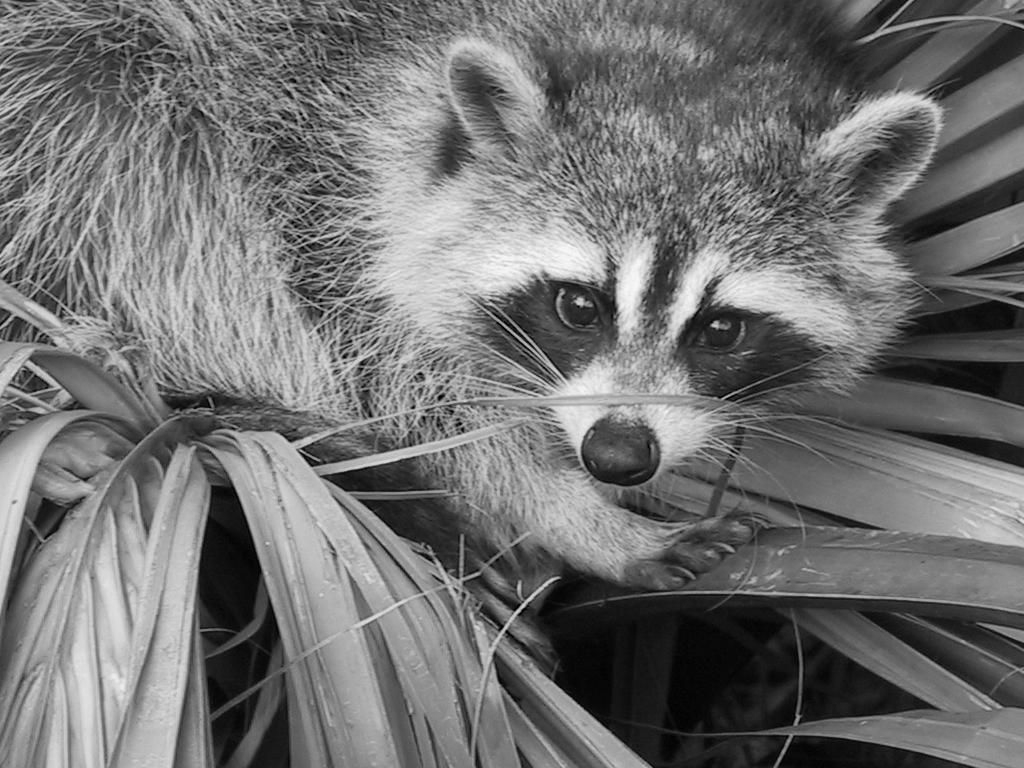

In [7]:
from scipy import misc
import cv2
from google.colab.patches import cv2_imshow # OpenCV의 imshow는 브라우저에서 이미지를 출력하는 

img_gray=misc.face(gray=True)
print(img_gray.shape)
cv2_imshow(img_gray)


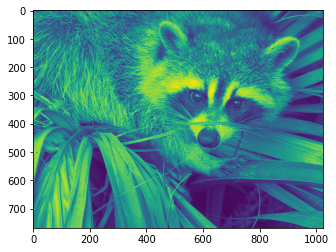

In [10]:
import matplotlib.pyplot as plt # matplotlib 이용해서 이미지 출력하기

plt.imshow(img_gray)
plt.show()

위 이미지 데이터는 768x1024  크기의 uint8 자료형 2차원 배열로서 좌측 상단의 25개 픽셀의 수치를 보면 다음과 같다.

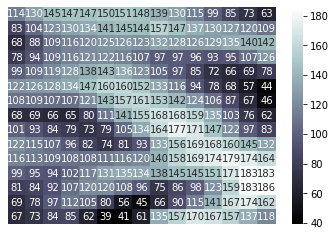

In [11]:
import seaborn as sns

sns.heatmap(img_gray[:15, :15], annot=True, fmt='d', cmap=plt.cm.bone)
plt.axis('off')
plt.show()

### 1.2.2 RGB
RGB 색공간에서 색은 적, 녹, 청의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 구성된다. 8비트의 부호없는 정수를 사용하는경우 (255,0,0) (0,255,0) (0,0,255)는 각각 적,녹,청이 된다.<br>
픽셀 데이터가 스칼라가 아닌 벡터이므로 이미지 데이터는 (세로픽셀x가로픽셀)이 아니라 (세로픽셀x가로픽셀x색채털) 형태의 3차원 배열로 저장된다. 세번째 축을 색채널(channel)이라 한다.

(427, 640, 3)


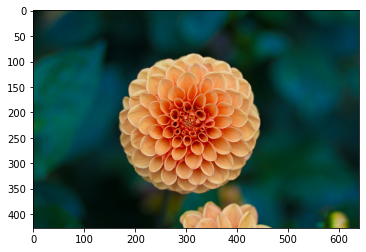

In [13]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()
img_rgb = dataset.images[1]
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

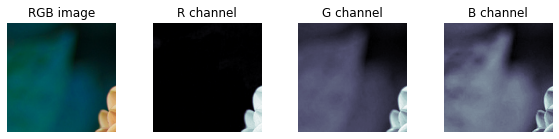

In [15]:
plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB image")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R channel")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G channel")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B channel")

plt.show()

### 1.2.3 HSV(Hue,Saturation,Value)
HSV 색공간에서는 색이 다음 세 가지 값으로 표현한다.
1. 색상:색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다.<br> 0~360도의 범위를 갖고 360과 0도는 빨강을 가리킨다.
2. 채도: 채도값 S는 특정한 색상의 진한 정도를 나타낸다. 가장 진한 상태가 100%이고 가장 연한 상태는 0%로 표현한다.
3. 명도 : 명도값 V는 밝은 정도를 나타낸다. 흰색, 빨간색은 100%이며 검정은 0%이다.<br>

아래 코드는 100일때의 색공간을 시각화 한 것이다.

In [17]:
from matplotlib.colors import hsv_to_rgb
import numpy as np

V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V)) # dstack 배열을 합치는 함수 stack hstack 등등의 방법에 따라 합치는 방향과 모양(배열의 shape)이 달라진다.
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [18]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [19]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [20]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

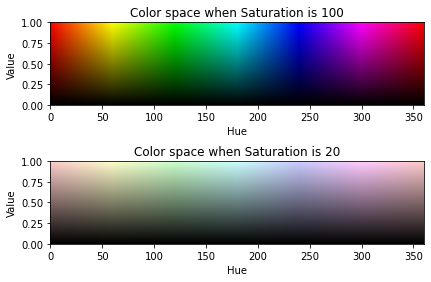

In [22]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("Hue")
plt.ylabel("Value")
plt.title("Color space when Saturation is 100")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("Hue")
plt.ylabel("Value")
plt.title("Color space when Saturation is 20")
plt.grid(False)

plt.tight_layout()
plt.show()

matpplotlib 패키지의 **rgb_to_hsv**, **hsv_to_rgb** 명령을 사용하면 RGB 색공간 표현과 HSV색공간 표현을 상호변환 할 수 있다.<br>
HSV 색공간으로 표현된 파일은 **imshow**로 바로 볼 수 없다. 이 외에도 RGB, HSV 색공간에 투명도를 표현하는 A(alpha) 채널의 추가된 형식인 RGBA, HSVA 등등의 색공간도 있다.


## 1.3  이미지 파일형식
.bmp 확장자를 가지는 비트맵(bitmap) 파일은 지금까지 설명한 다차원 배열정보를 그대로 담고있다. 하지만 비트맵 파일은 파일 용량이 크기 때문에 압축을 통해 용량을 줄인 JPG, GIF, PNG 등의 압축 파일 형식도 많이 사용한다.<br>

- JPEG : JPEG는 Joint Picture Experts Group의 약자로 이미지 압축 기술자 모임인 JPEG 위원회에서 개발한 이미지 파일 형식이다. JPEG 파일은 웹상 및 멀티미디어 환경에서 가장 널리 사용되고 있는 포맷이다. JPG라는 확장자도 같이 사용된다.

  - 장점

    RGB모드와 CMYK모드를 둘 다 지원한다.

    RGB 이미지의 모든 컬러 정보를 유지한다.

    이미지를 만드는 사람이 이미지의 질과 파일의 크기를 손실압축방식을 통해 조정할 수 있다.

  - 단점

    투명 이미지를 지원하지 않는다.

    압축율을 높일 수록 이미지의 질이 손상된다.

    레이어와 알파채널을 지원하지 않는다.

- GIF : GIF는 Graphics Interchange Format의 약자로 1987년 미국의 통신업체인 컴퓨서브(Compuserve)에서 개발한 포맷이다.

  - 장점

    하나의 파일에 여러 비트맵을 저장하여 다중 프레임 애니메이션을 구현 할 수 있다.

    투명 이미지를 지원한다.

    애니메이션을 특별한 플러그인 없이 여러 환경에서 쉽게 적용할 수 있다.

  - 단점

    8비트 256 컬러로 제한된다.

- png : PNG는 Potable Network Graphics의 약자이다. GIF 포맷을 대체하기 위해 개발된 파일 포맷이다.

  - PNG의 장점

    비손실 압축방식으로 원본에 손상 없이 파일의 크기를 줄여준다.

    이미지의 모든 컬러정보와 알파 채널을 보존하고 있으므로 포토샵에서 활용하기 용이하다.

    문자 혹은 날카로운 경계가 있는 이미지인 경우 JPG보다 PNG가 효과적이다.

  - PNG의 단점

    애니메이션을 만들 수 없다.

    JPG 와 GIF보다 용량이 크다.

## 1.4 Pillow을 통한 이미지 데이터 처리
Pillow는 이전에 사용하던 PIL을 대체하기 위해 등장한 라이브러리로 JPEG, BPM, GIF, PNG, PPM, TIFF 등의 다양한 포맷을 지원하고 초보자가 다루기 쉽다는 장점이 있다. 여기에서는 Pillow 버전 5.2를 기준으로 설명한다. PIL 패키지의 대체이므로 임포트 이름이 PIL 패키지와 같다.

In [23]:
import PIL
PIL.__version__

'7.1.2'

### 1.4.1 이미지 읽고 쓰기

In [24]:
!wget -O logo.png https://www.python.org/static/community_logos/python-logo-master-v3-TM.png

--2022-11-12 17:14:37--  https://www.python.org/static/community_logos/python-logo-master-v3-TM.png
Resolving www.python.org (www.python.org)... 151.101.24.223, 2a04:4e42:6::223
Connecting to www.python.org (www.python.org)|151.101.24.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83564 (82K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>]  81.61K  --.-KB/s    in 0.008s  

2022-11-12 17:14:37 (10.3 MB/s) - ‘logo.png’ saved [83564/83564]



In [25]:
from PIL import Image

img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

Image를 사용하면 하나의 객체로써 사용되기 때문에 주피터 노트북에서 바로 호출하여 볼 수 있다.

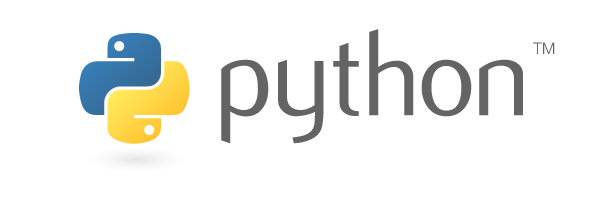

In [26]:
img_logo_png

저장할 때는 Save 메서드를 사용한다. 이 때 확장자를 지정하면 해당 이미지 형식으로 자동 변환해준다.

In [27]:
img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp")

이미지 데이터 처리를 위해 Image 클래스 객체를 NumPy 배열로 변환할 때는 np.array 함수를 사용한다. NumPy 배열이 되면 matplotlib의 imshow 명령으로 볼 수 있다

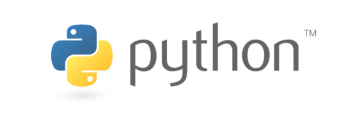

In [28]:
img_logo_array = np.array(img_logo_bmp)

plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

반대로 nparray를 Image 객체로 바꿀 때는 fromarray라는 클래스 메서드를 사용하여 변환할 수 있다.

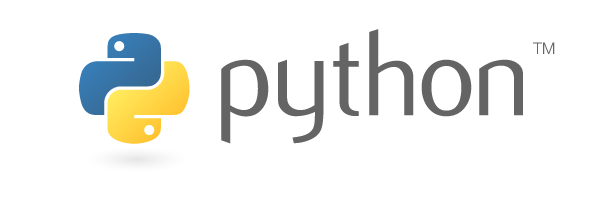

In [29]:
Image.fromarray(img_logo_array)

### 1.4.2 이미지 크기 변환
이미지의 크기를 확대 또는 축소하려면 resize 메서드를 사용한다. 인수로는 지정할 사이즈의 튜플을 활용한다.

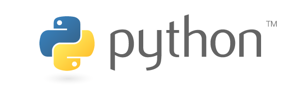

In [30]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

 썸네일(thumbnail) 이미지를 만들고 싶으면 Image 객체의 thumbnail 메서드를 사용한다.<br> '''resize''' 메서드는 원래 객체는 그대로 유지한 채 변환된 이미지를 반환하게 되지만 thumbnail 메서드는 원래 객체 즉 원본 파일을 바꾸는 inplace 메서드이므로 주의해서 사용하여야 한다.

### 1.4.3 이미지 회전
이미지를 회전하기 위해서는 rotate 메서드를 호출한다.<br>
인수로는 도단위의 각도를 입력한다.<br>입력 각도만큼 반시계 방향으로 회전한다.

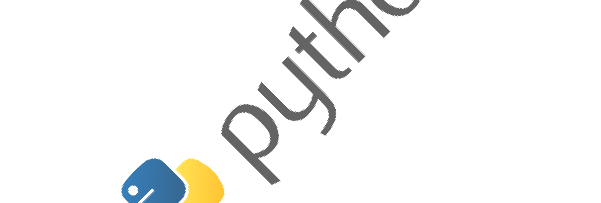

In [31]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

### 1.4.4 이미지 잘라내기
"crop" 메서드를 사용하면 이미지에서 잘라내고 싶은 부분(ROI: region of interest)만 추출할 수 있다. 인수로 ROI의 좌-상, 우-하의 좌표를 받는다.

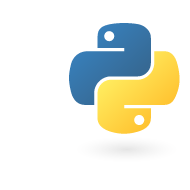

In [32]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

## 1.5 Scikit-Image 라이브러리


In [33]:
import skimage
skimage.__version__

'0.18.3'

### 1.5.1 샘플 이미지 다운로드
이미지는 Numpy 배열 자료형으로 사용된다.

(512, 512, 3)


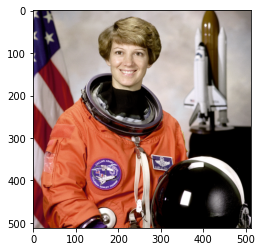

In [38]:
import skimage.data

img_astro = skimage.data.astronaut()
print(img_astro.shape)
plt.imshow(img_astro)
plt.show()

### 1.5.2 이미지 읽고 쓰기
Scikit-Image 패키지로 이미지를 읽고 쓸 때는 io 서브패키지인, "imsave", "imreat" 명령을 사용한다.<br> 파일 확장자를 지정하면 해당 이미지 형식으로 자동 변환해준다.

In [39]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

### 1.5.3 색공간의 변환
[Pixel 단위로 Figure 크기 조정하기](https://sosomemo.tistory.com/62)

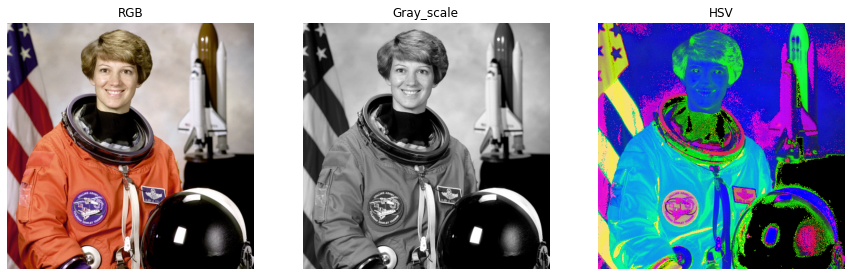

In [47]:
from skimage import color

plt.figure(figsize=(15,6))
plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("Gray_scale")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")


plt.show()

## 1.6 OpenCV
OpenCV는 이미지 처리, 컴퓨터 비전을 위한 라이브러리이다. 다양한 플랫폼에서 지원되며 실시간 이미지 처리에 중점을 두었으며 많은 영상처리 알고리즘을 구현해 놓았다.

In [48]:
import cv2
cv2.__version__

'4.6.0'

### 1.6.1 파일 읽고 쓰기
이미지를 읽을 때는 "imread" 메서드를 사용하며 인수로 파일이름과 함께 "flag"를 넣을 수 있다.
- cv2.IMREAD_COLOR: 이미지 파일을 컬러로 읽는다. 투명한 부분은 무시되며, flag의 Default value다.
- cv2.IMREAD_GRAYSACLE : 이미지 파일을 그레이 스케일(흑백)으로 읽는다. 실제 이미지 처리시 중간단계로 많이 사용된다.
- cv2.IMREAD_UNCHANGED: 이미지 파일을 알파 채널까지 읽는다.(알파 채널은 위에서 언급 했듯이 투명도를 나타낸다)

In [49]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(512, 512, 3)

❓OpenCV도 Numpyarray형태로 저장하지만 색채널의 순서가 B-G-R 로 반대로 되어있다는 점을 주의해야한다.<br>
이렇게 개발된 이유는 OpenCV를 개발하던 초기에는 BGR 색공간이 카메라 제조사나 소프트웨어 개발자들에게 보편적이였기 때문이다.

In [51]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro3)

# b, r을 서로 바꿔서 Merge
img_astro3_rgb = cv2.merge([r, g, b])


cvtColor 명령을 사용하면 더 간단하게 색공간을 변환할 수도 있다.

In [52]:
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

이미지 파일을 만들 때는 **imwrite** 명령을 사용한다.

In [53]:
cv2.imwrite("./gray_astronaut.png", img_astro3_gray)

True

### 1.6.2 이미지 크기 변환
OpenCV 역시 resize()로 이미지 크기 변환을 제공한다.

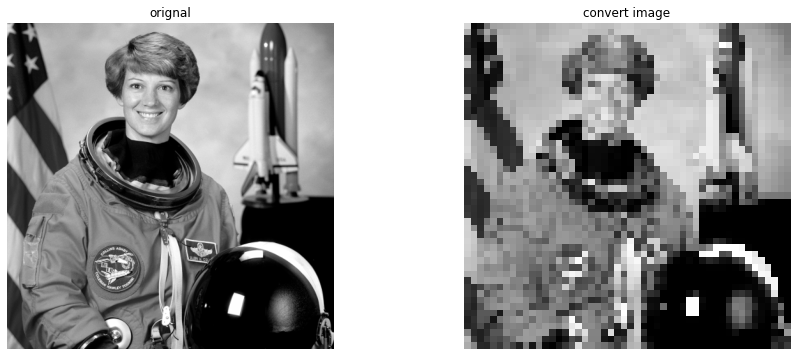

In [57]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("orignal")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("convert image") # 이미지가 깨진 이유는 축소된 이미지를 원본이미지와 동일한 크기로 표현하다보니 화질이 깨지는 현상이 일어난다.
plt.axis("off")

plt.show()